In [10]:
cd(@__DIR__)
include("table_reader.jl")

extract_series (generic function with 1 method)

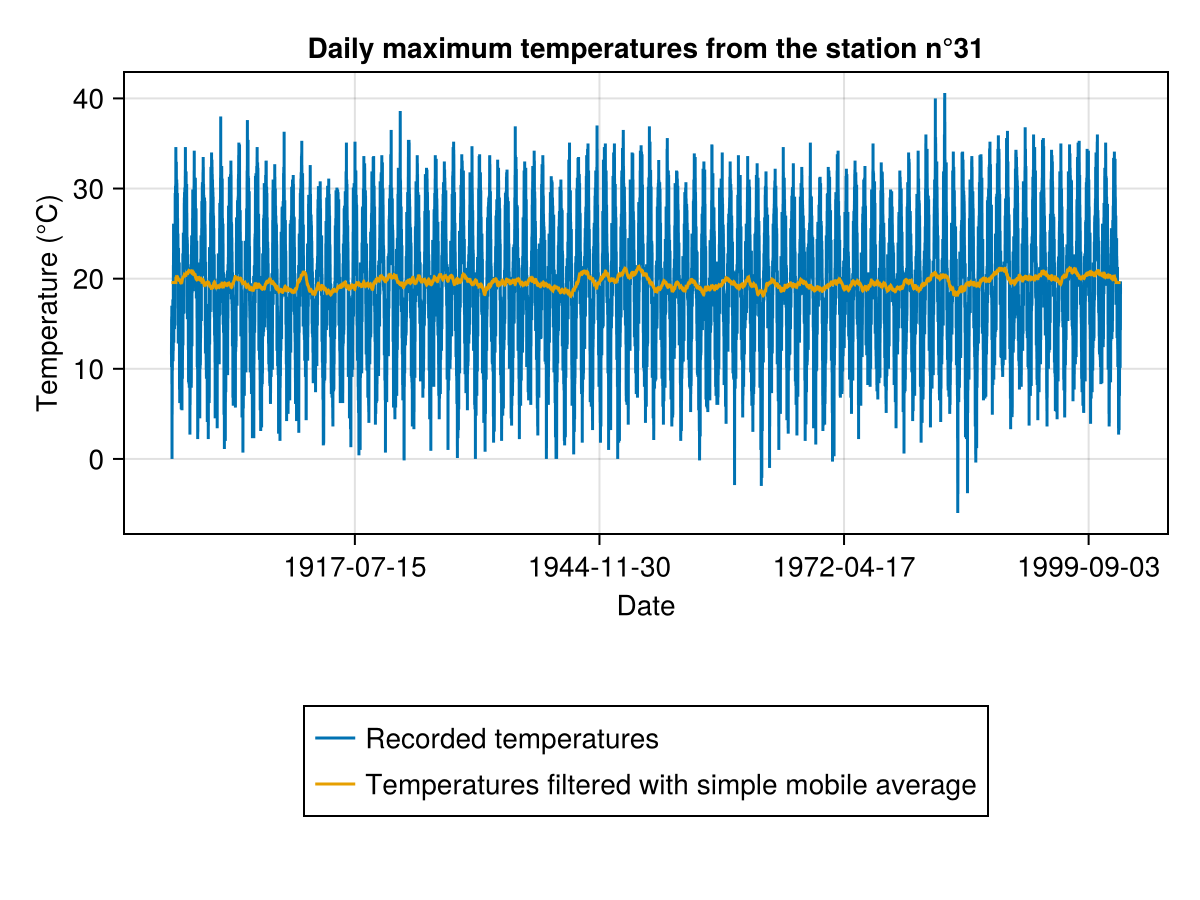

In [14]:
series,fig=extract_series("TX_STAID000031.txt",plot=true)
fig

## Drift

Estimating the MSE estimators to remove drift

In [ ]:
N=size(series)[1]
X=cat(ones(N),1:N,dims=2)
beta=inv(transpose(X)*X)*transpose(X)*series[!,2]

2-element Vector{Float64}:
 19.366009056392556
  1.0215034069842917e-5

There is only a constant

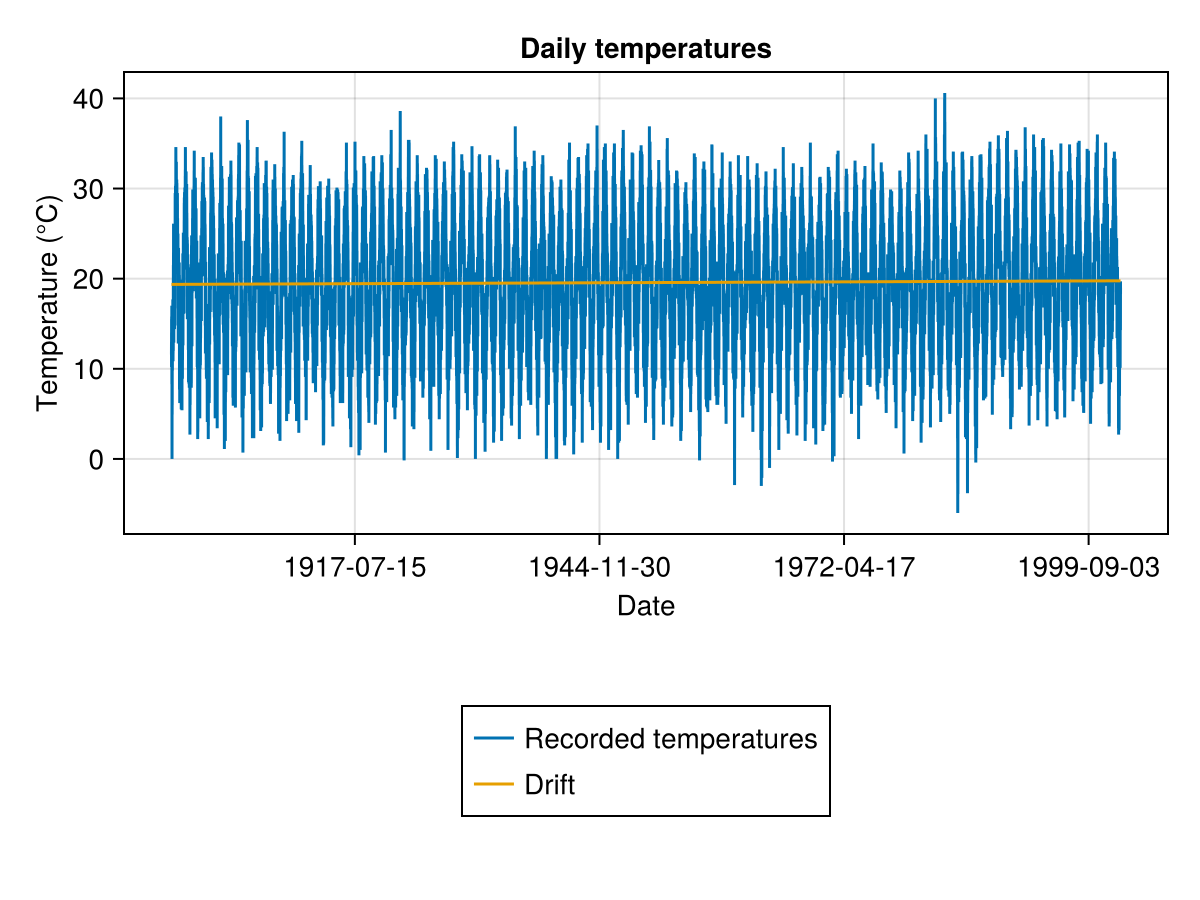

In [36]:
fig=Figure()
ax, plot1=lines(fig[1:2, 1:2], series.DATE, series[!,2])
plot2=lines!(ax,series.DATE,X*beta)
ax.title="Daily temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
Legend(fig[3, 1:2],[plot1,plot2],["Recorded temperatures","Drift"])
current_figure()

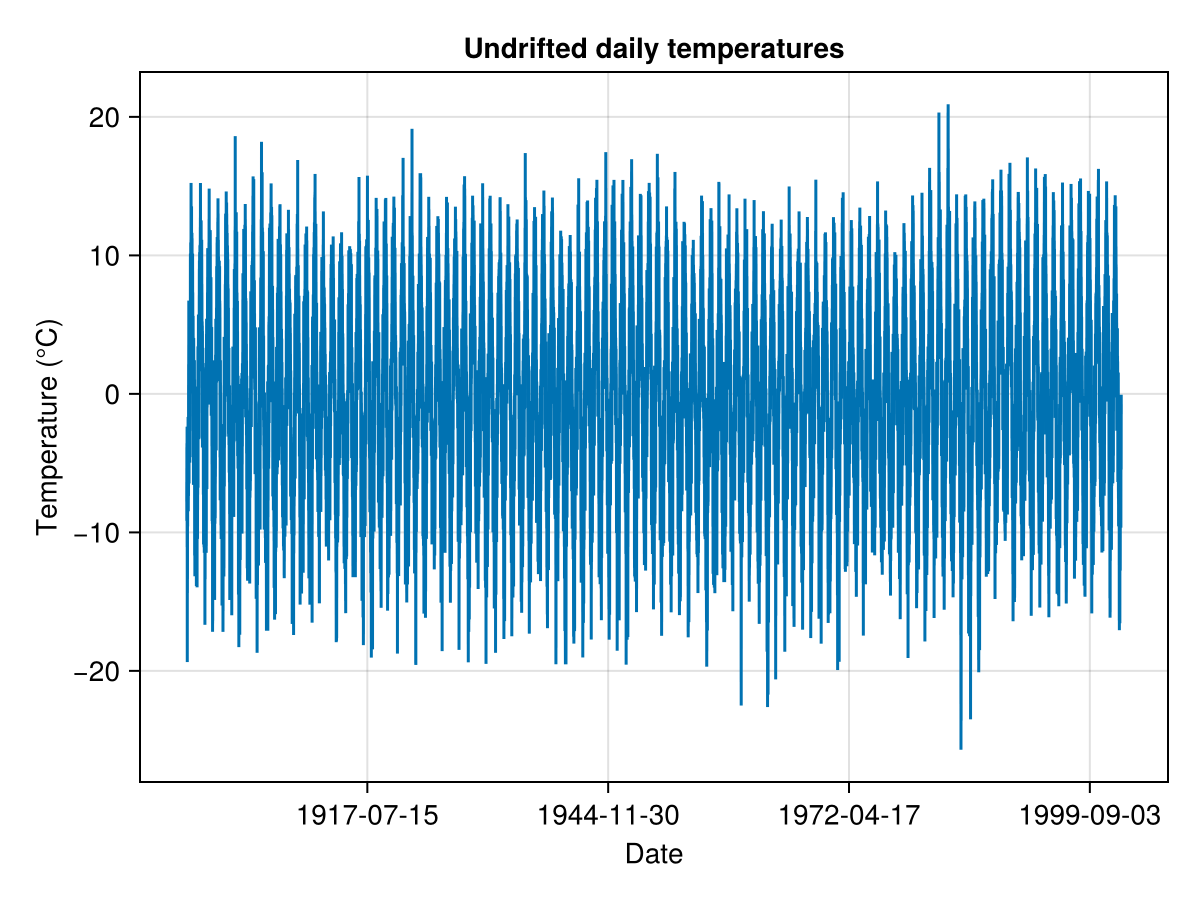

In [39]:
undrifted_series=series[!,2]-X*beta

fig, ax = lines(series.DATE, undrifted_series)
ax.title="Undrifted daily temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
current_figure()

## Periodicity

In [55]:
k=N ÷ 365
k*365
collect(1:365:k*365)

106-element Vector{Int64}:
     1
   366
   731
  1096
  1461
  1826
  2191
  2556
  2921
  3286
     ⋮
 35406
 35771
 36136
 36501
 36866
 37231
 37596
 37961
 38326

In [56]:
k=N ÷ 365 #k : number of years
average_period=mean(undrifted_series[i:364+i] for i in 1:365:(k-1)*365)

365-element Vector{Float64}:
 -7.840852999024626
 -7.86848226167774
 -7.472302000521335
 -7.786597929841122
 -7.358036716303765
 -7.416142169433068
 -7.493295241609997
 -7.134257837596449
 -7.360934719297186
 -7.45713541052173
  ⋮
 -8.060680027343965
 -7.8959283376161356
 -7.814986171697822
 -7.5330916248271285
 -7.524530411289771
 -8.095969197752408
 -7.9950270318341
 -7.9178943897253165
 -7.976952223807

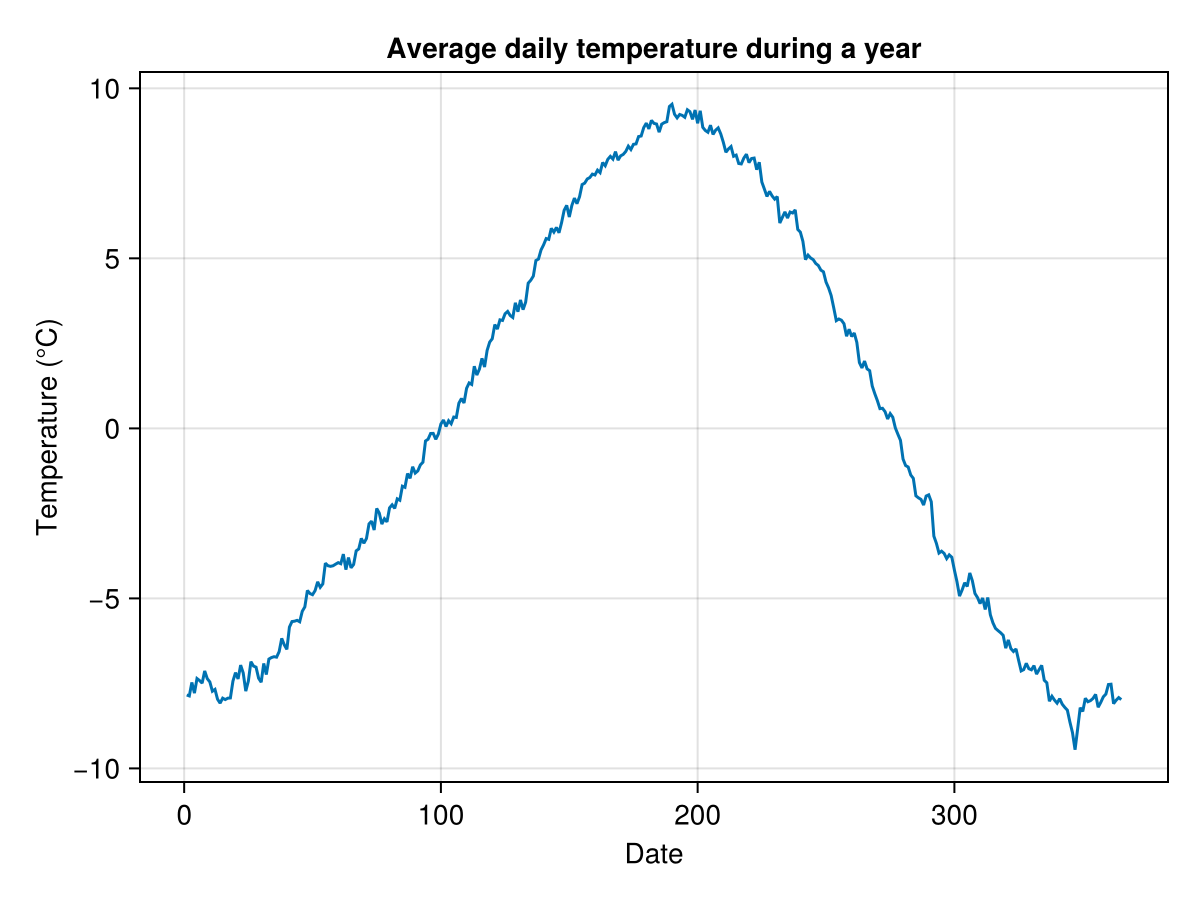

In [ ]:
fig, ax = lines(1:365, average_period)
ax.title="Average daily temperature during a year (centered)"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
current_figure()

In [ ]:
repeated_period=append!(repeat(average_period,outer=k),average_period[1:N % 365])
filtered_series=undrifted_series-repeated_period

38758-element Vector{Float64}:
 -7.840852999024626
 -7.86848226167774
 -7.472302000521335
 -7.786597929841122
 -7.358036716303765
 -7.416142169433068
 -7.493295241609997
 -7.134257837596449
 -7.360934719297186
 -7.45713541052173
  ⋮
 -3.9490747336537946
 -3.980513520116436
 -3.6986189732457433
 -4.154819664470291
 -3.798639403313881
 -4.1005543802527145
 -4.003421738143926
 -3.602479572225616
 -3.546299311069208

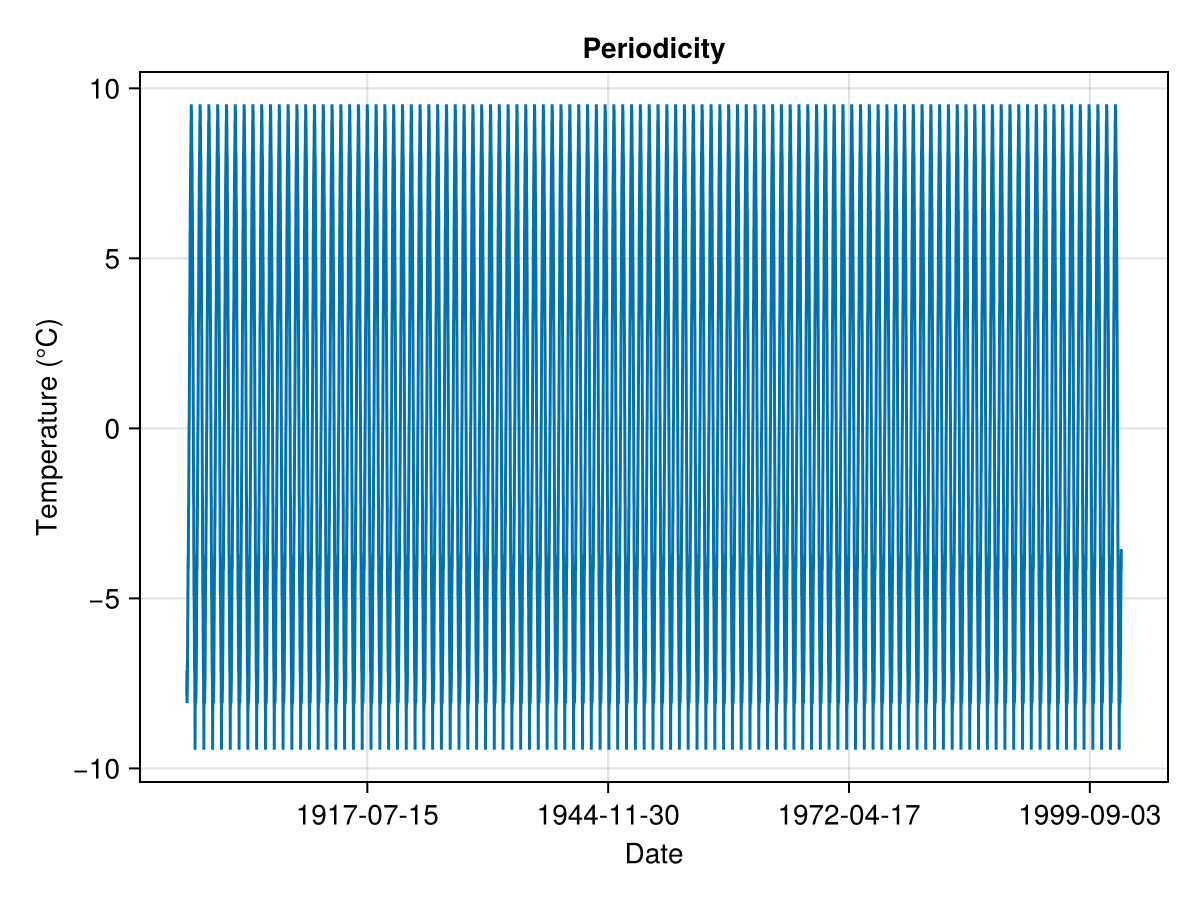

In [85]:
fig, ax = lines(series.DATE, repeated_period)
ax.title="Periodicity"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
current_figure()

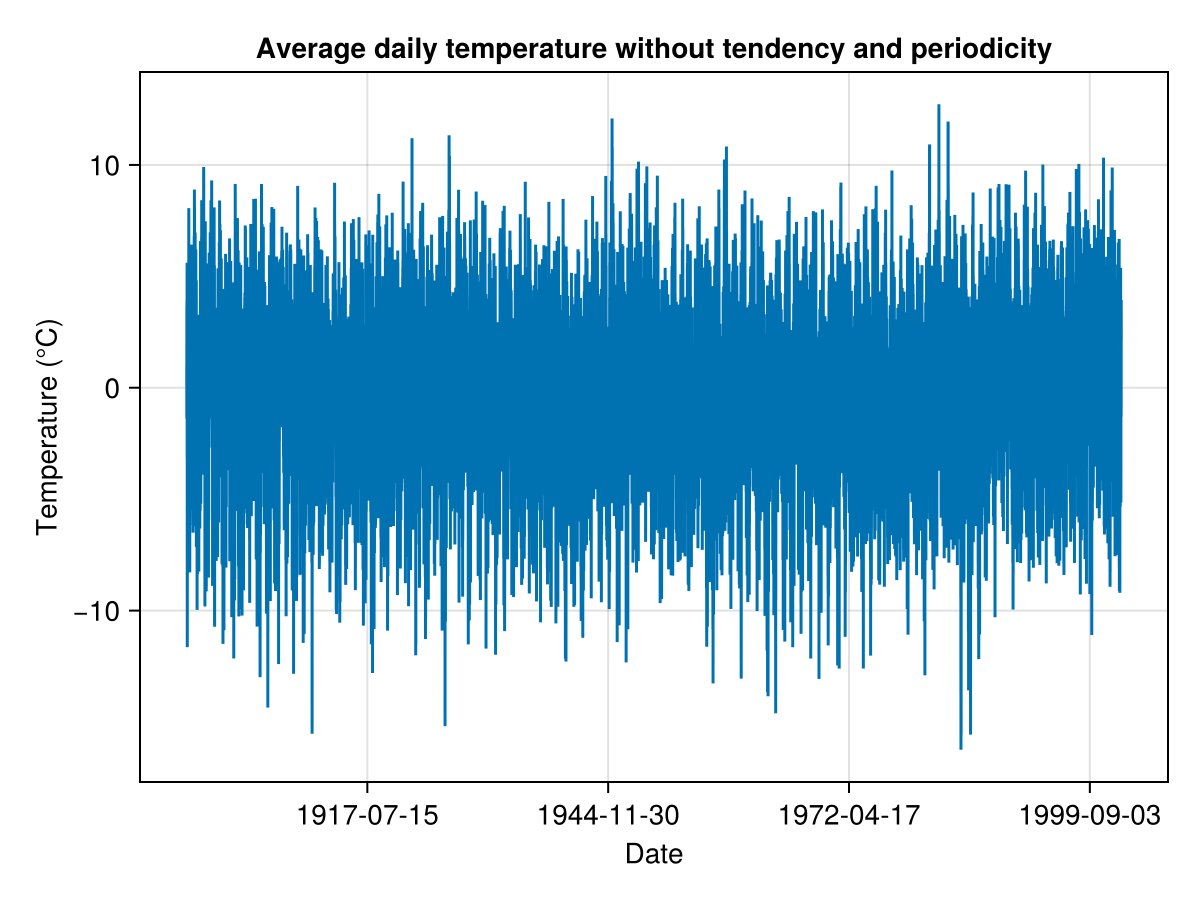

In [94]:
fig, ax = lines(series.DATE, filtered_series)
ax.title="Average daily temperature without tendency and periodicity"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
current_figure()